## Working with Images with PIL

Importing images is easy enough

In [1]:
%pylab inline

from PIL import Image, ImageDraw

Populating the interactive namespace from numpy and matplotlib


(150, 210)


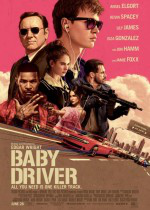

In [2]:
baby = Image.open('posters/Baby Driver.png')
print(baby.size)
baby

What if you want to draw overtop of your image?

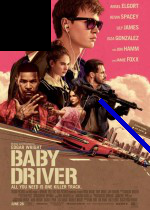

In [3]:
#(0, 0) is in the upper-left in PIL
draw = ImageDraw.Draw(baby)
draw.rectangle([(0, 0), (50, 50)], fill=(0, 0, 0)) # black box
draw.line([(200, 200), (100, 100)], fill=(0, 0, 200), width=6) # blue line
baby

What if we want to tile the image?

In [4]:
x, y = baby.size
xsteps = x / 50
ysteps = y / 50

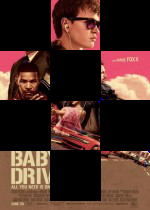

In [5]:
for xstep in range(int(xsteps)):
    for ystep in range(int(ysteps)):
        if xstep % 2 == 1 and ystep % 2 == 1:
            draw.rectangle([(xstep*50, ystep*50), ((xstep+1)*50, (ystep+1)*50)], fill=(0, 0, 0))
        if xstep % 2 == 0 and ystep % 2 == 0:
            draw.rectangle([(xstep*50, ystep*50), ((xstep+1)*50, (ystep+1)*50)], fill=(0, 0, 0))

baby

What about creating an image from scratch?

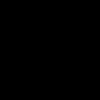

In [6]:
blackBox = Image.new('RGBA', (100, 100), color=(0, 0, 0))
blackBox

##  Using Numpy with Images

Every pixel has a tuple containing its RGB values. And the image is made up of Width x Height pixels.

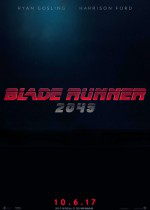

In [7]:
img = Image.open('posters/Blade Runner 2.png')
img

In [8]:
vec = np.array(img)
vec.shape

(210, 150, 3)

How many total data points?

In [9]:
vec.size

94500

Manipulating the dimensions of numpy array is really easy.

In [10]:
vec.reshape(31500, 3)

array([[ 7, 19, 35],
       [ 8, 20, 36],
       [ 8, 20, 36],
       ..., 
       [ 0,  0,  5],
       [ 3,  4,  9],
       [ 0,  1,  5]], dtype=uint8)

If you pass -1 for any of the arguments, it find the number that vec.size divides cleanly into from the other argument.

Note that this gives the same output as above.

In [11]:
vec.reshape(-1, 3)

array([[ 7, 19, 35],
       [ 8, 20, 36],
       [ 8, 20, 36],
       ..., 
       [ 0,  0,  5],
       [ 3,  4,  9],
       [ 0,  1,  5]], dtype=uint8)

## Clustering

In [12]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" '
     'src="https://www.youtube.com/embed/IuRb3y8qKX4" '
     'frameborder="0" gesture="media" allow="encrypted-media" '
     'allowfullscreen></iframe>')

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This a classical dataset in Machine Learning. Let's trim it down a bit so we can visualize it in two dimesnsions.

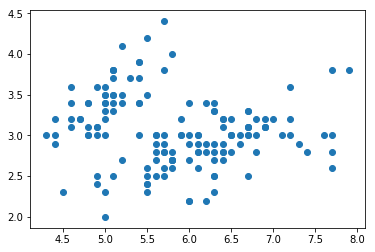

In [14]:
trimmedData = iris.loc[: , ['sepal_length', 'sepal_width']]

plt.scatter(x=trimmedData['sepal_length'], y=trimmedData['sepal_width'])

Instantiating our model, fitting it with our data, then making a new column for which "mean" each record was assigned to

In [15]:
model = KMeans(n_clusters=3)
model.fit(trimmedData)
trimmedData['label'] = model.labels_

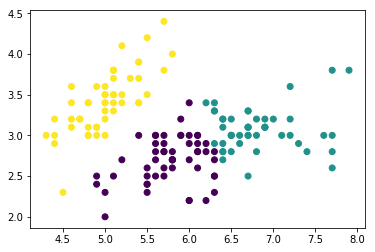

In [16]:
plt.scatter(x=trimmedData['sepal_length'], y=trimmedData['sepal_width'], c=trimmedData['label'])

## All Together

In [17]:
from imagetools import (path_to_img_array
                         , pick_colors
                         , show_key_colors)

Boring poster, right?

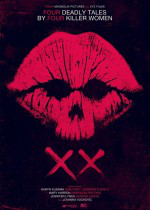

In [18]:
path = 'posters/XX.png'
img = path_to_img_array(path)
Image.open(path)

We print out the RGB values of each of the means, followed by a visualization of them.

(11, 2, 26)
(205, 11, 69)
(142, 13, 54)
(104, 97, 112)
(60, 11, 37)


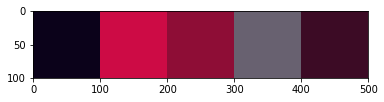

In [19]:
plt.imshow(show_key_colors(pick_colors(img, 5)))

What about a more interesting poster? (From a movie I never heard of...)

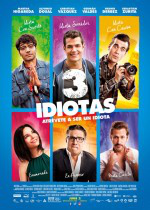

In [20]:
path = 'posters/3 Idiotas.png'
img = Image.open(path)
img

(35, 100, 136)
(203, 158, 132)


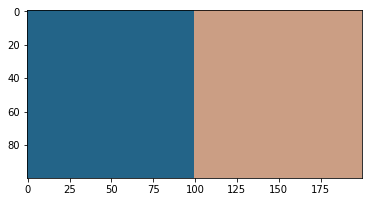

In [21]:
img = path_to_img_array(path)
plt.imshow(show_key_colors(pick_colors(img, 2)))

Interestingly, we captured the blue of the image (the majority color). But all of the rest of the image averaged out to a gross beige.

What happens when we allow for more means?

(19, 127, 189)
(142, 101, 109)
(230, 175, 47)
(222, 206, 200)
(42, 39, 35)


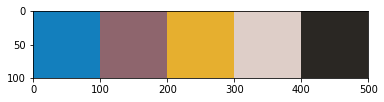

In [22]:
img = path_to_img_array(path)
plt.imshow(show_key_colors(pick_colors(img, 5)))

(233, 180, 29)
(9, 124, 189)
(81, 112, 100)
(236, 232, 227)
(214, 167, 146)
(39, 30, 29)
(173, 75, 95)
(108, 160, 199)


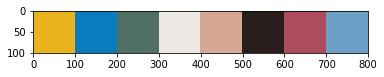

In [23]:
img = path_to_img_array(path)
plt.imshow(show_key_colors(pick_colors(img, 8)))

So obviously allowing for more means, could help us pick out more unique colors. Neat.

Now what happens when we've got a larger image? (Source: Grand Budapest Hotel (2012))

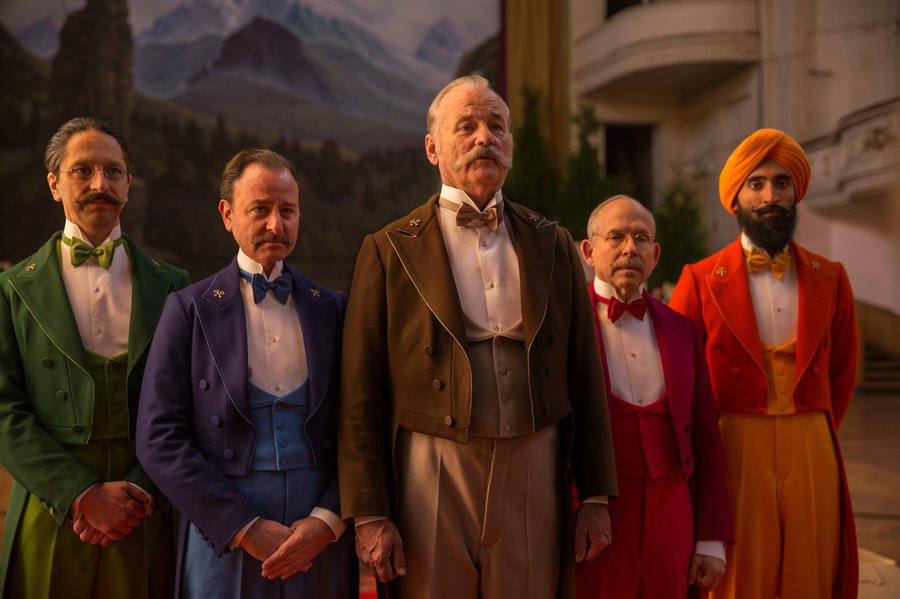

In [24]:
Image.open('Images/wes.png')

In [25]:
path = 'images/wes.png'
img = path_to_img_array(path)
print(img.size, 'pixels:', img.shape[0], 'by', img.shape[1], 'with RGB values')

1617300 pixels: 599 by 900 with RGB values


Using the %time command, we can see how long it takes us to figure out the mean colors.

(62, 53, 58)
(145, 101, 84)
(84, 7, 6)
(30, 19, 13)
(216, 139, 93)
(72, 41, 20)
(109, 78, 62)
(134, 39, 8)
Wall time: 31 s


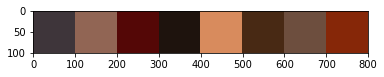

In [26]:
%time plt.imshow(show_key_colors(pick_colors(img, 8)))

31 seconds. Compare that to a much smaller image.

94500 pixels: 210 by 150 with RGB values
(28, 3, 28)
(178, 15, 64)
(65, 55, 73)
(73, 8, 37)
(6, 1, 26)
(129, 11, 49)
(212, 10, 71)
(120, 114, 129)
Wall time: 2.22 s


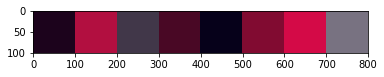

In [27]:
path = 'posters/XX.png'
img = path_to_img_array(path)
print(img.size, 'pixels:', img.shape[0], 'by', img.shape[1], 'with RGB values')

%time plt.imshow(show_key_colors(pick_colors(img, 8)))

In [28]:
img.shape[0] * img.shape[1]

31500

Scales pretty iffy, yeah?

You can imagine what would happen if we tried running it for this image

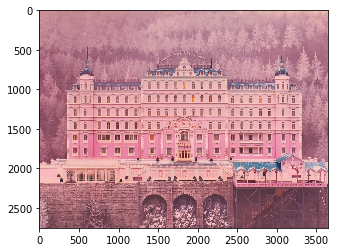

In [29]:
path = 'images/bigWes.png'
img = Image.open(path)
plt.imshow(img)

Which is actually of size

In [30]:
img.size

(3652, 2752)

Which brings us to the interesting notion of scaling back your image so KMeans has less to work over.

I took the following image (source: Zootopia (2016))

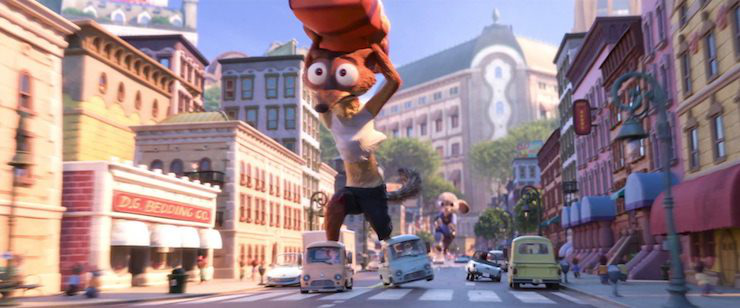

In [31]:
zoo = Image.open('Images/zoo.png')
zoo

And literally "Resized it (maintaining aspect ratio) down to 50 pixels wide" and then back up to its original size

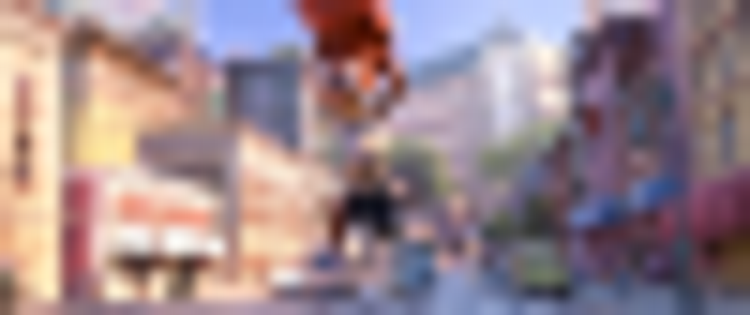

In [32]:
grainy = Image.open('Images/grainyZoo.png')
grainy

And then ran the KMeans against the both of them

(73, 51, 59)
(246, 219, 196)
(179, 185, 227)
(170, 141, 144)
(114, 97, 112)


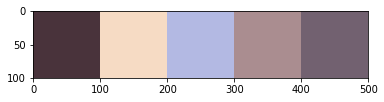

In [33]:
img = np.array(zoo)
plt.imshow(show_key_colors(pick_colors(img, 5)))

(120, 104, 118)
(183, 189, 227)
(84, 61, 73)
(235, 201, 175)
(172, 147, 149)


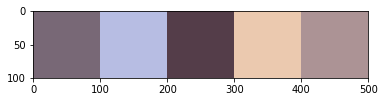

In [34]:
img = np.array(grainy)
plt.imshow(show_key_colors(pick_colors(img, 5)))

The similarity of the two results shouldn't surprise you. After all, KMeans is just averaging-- which is precisely what's happening when I scale down and then back up with the image:
* We need to compress an image into less space, so we remove data that's close enough to its neighbor that we still have it
* When we scale back out, we do sort of broadcast that "representitive color" out to its surrounding area in order to fill the space

Because it's just averages, we arrive at more or less the same palette

Now the question becomes: How much can we scale things down before we're guaranteed to lose our information?

Imagine a scenario where I shrank the picture to 3 pixels wide, not 50. What then?

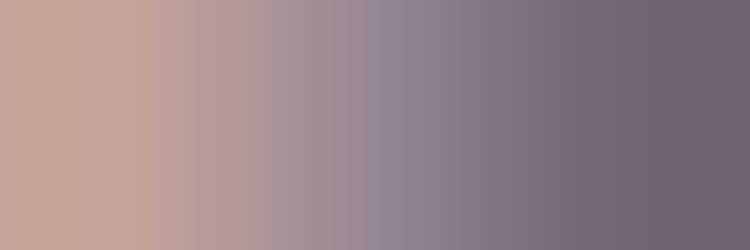

In [35]:
huh = Image.open('Images/RIPZoo.png')
huh

(73, 73, 72)
(26, 26, 26)
(45, 45, 45)
(4, 4, 4)
(61, 60, 60)


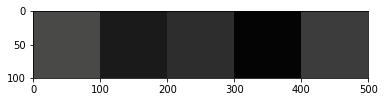

In [36]:
img = np.array(huh)
plt.imshow(show_key_colors(pick_colors(img, 5)))

Weird, huh?